In [62]:
import pandas as pd
data = pd.read_csv(r'D:\Users\Salman Taufeeq\Documents\SOIL Documents\6th TERM\AI with Deep Learning\HistoricalData_Apple.CSV')
data.head()

,Date,Close,Volume,Open,High,Low
0,02/23/2024,$182.52,45119680,$185.01,$185.04,$182.23
1,02/22/2024,$184.37,52292210,$183.48,$184.955,$182.46
2,02/21/2024,$182.32,41529670,$181.94,$182.8888,$180.66
3,02/20/2024,$181.56,53665550,$181.79,$182.43,$180.00
4,02/16/2024,$182.31,49752470,$183.42,$184.85,$181.665


In [63]:
print(data.dtypes)

Date      object
Close     object
Volume     int64
Open      object
High      object
Low       object
dtype: object


In [64]:
# Remove special characters ('$') from 'Close', 'Open', 'High', and 'Low' columns
data['Close'] = data['Close'].str.replace('$', '').astype(float)
data['Open'] = data['Open'].str.replace('$', '').astype(float)
data['High'] = data['High'].str.replace('$', '').astype(float)
data['Low'] = data['Low'].str.replace('$', '').astype(float)

#  datetime format
data['Date'] = pd.to_datetime(data['Date'])

data.dropna(inplace=True)

print("Data Types After Conversion:")
print(data.dtypes)

print("Data After Conversion:")
print(data.head())


Data Types After Conversion:
Date      datetime64[ns]
Close            float64
Volume             int64
Open             float64
High             float64
Low              float64
dtype: object
Data After Conversion:
        Date   Close    Volume    Open      High      Low
0 2024-02-23  182.52  45119680  185.01  185.0400  182.230
1 2024-02-22  184.37  52292210  183.48  184.9550  182.460
2 2024-02-21  182.32  41529670  181.94  182.8888  180.660
3 2024-02-20  181.56  53665550  181.79  182.4300  180.000
4 2024-02-16  182.31  49752470  183.42  184.8500  181.665


C:\Users\Salman Taufeeq\AppData\Local\Temp\ipykernel_14608\400775717.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Close'] = data['Close'].str.replace('$', '').astype(float)
C:\Users\Salman Taufeeq\AppData\Local\Temp\ipykernel_14608\400775717.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Open'] = data['Open'].str.replace('$', '').astype(float)
C:\Users\Salman Taufeeq\AppData\Local\Temp\ipykernel_14608\400775717.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['High'] = data['High'].str.rep

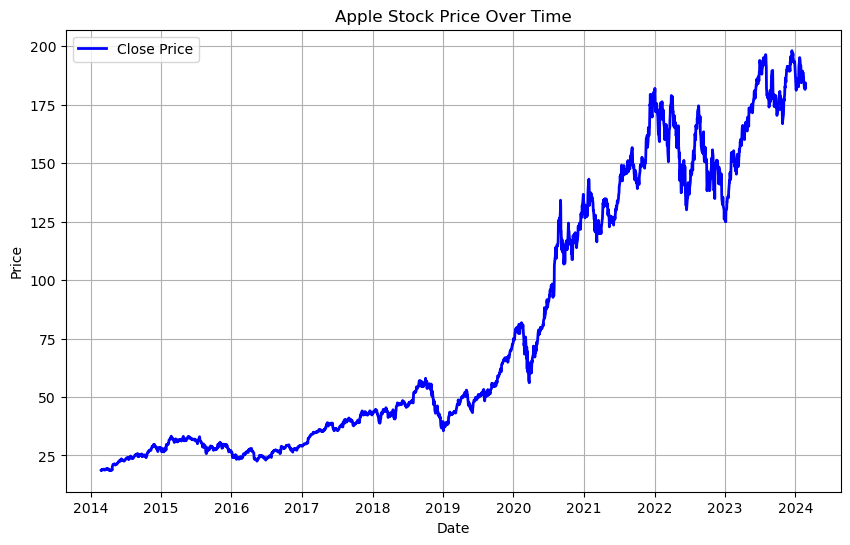

In [4]:
import matplotlib.pyplot as plt

# Plotting the line chart for Close price over time
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Close'], color='blue', linewidth=2, label='Close Price')
plt.title('Apple Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()



C:\Users\Salman Taufeeq\anaconda3\lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


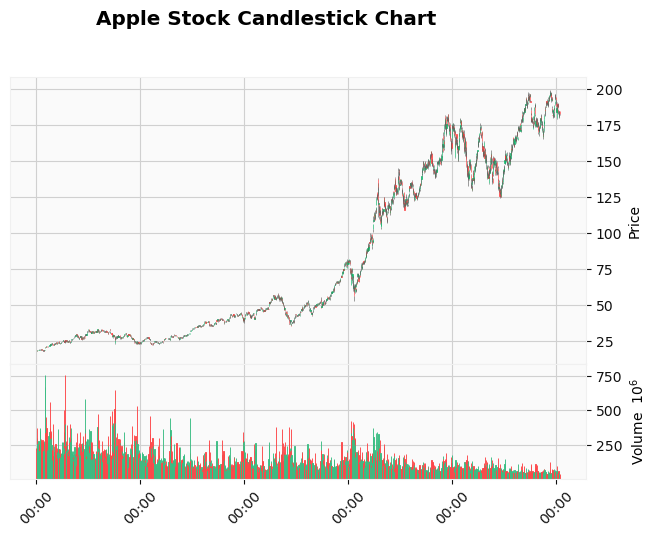

In [65]:
import pandas as pd
import mplfinance as mpf

data.index = pd.to_datetime(data.index)

# Reverse the order of the DataFrame
data_reversed = data.iloc[::-1]
mpf.plot(data_reversed, type='candle', style='yahoo', volume=True, title='Apple Stock Candlestick Chart', ylabel='Price')


C:\Users\Salman Taufeeq\anaconda3\lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+
C:\Users\Salman Taufeeq\anaconda3\lib\site-packages\mplfinance\_utils.py:308: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  d1s = dtseries.loc[date:]
C:\Users\Salman Taufeeq\anaconda3\lib\site-packages\mplfinance\_utils.py:342: UserWarning: Discarding nonzero nanoseconds in conversion.
  pydt = date.to_pydatetime()


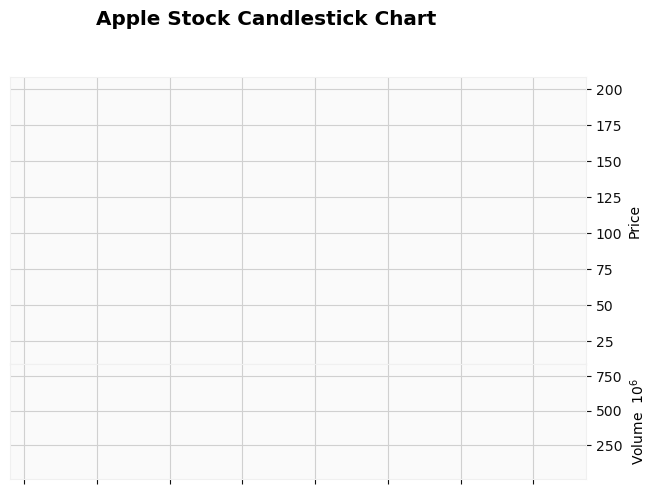

In [66]:
import pandas as pd
import mplfinance as mpf

data.index = pd.to_datetime(data.index)

# Reverse the order of the DataFrame
data_reversed = data.iloc[::-1]
mpf.plot(data_reversed, type='candle', style='yahoo', volume=True, title='Apple Stock Candlestick Chart', ylabel='Price', xlim=('2023-01-01', '2023-12-31'))



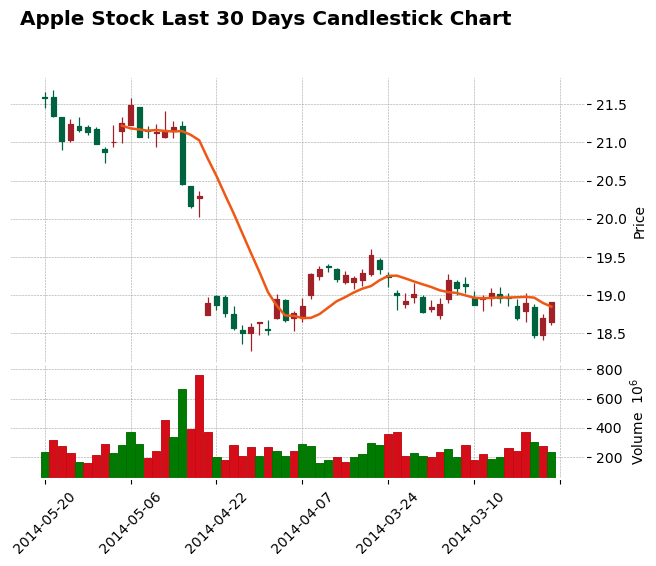

In [67]:
import pandas as pd
import mplfinance as mpf

last_30_days_data['Date'] = pd.to_datetime(last_30_days_data['Date'])

last_30_days_data.set_index('Date', inplace=True)

# Plotting the candlestick chart for the last 30 days
mpf.plot(last_30_days_data, type='candle', style='charles', volume=True, 
         title='Apple Stock Last 30 Days Candlestick Chart', ylabel='Price', 
         mav=(10), datetime_format='%Y-%m-%d')




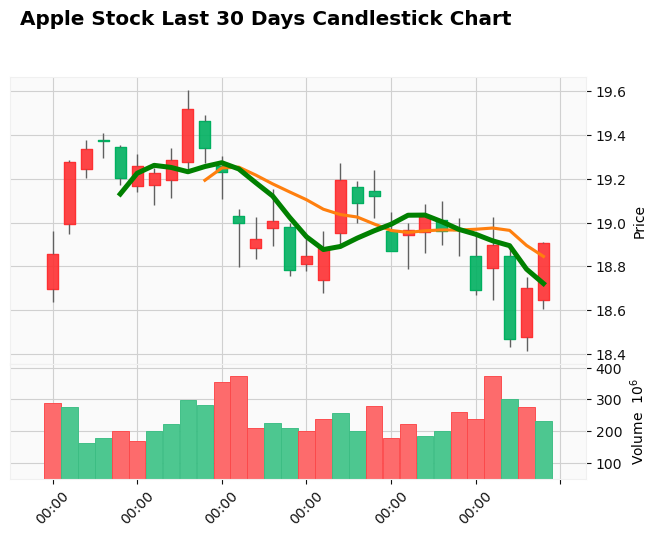

In [68]:
import mplfinance as mpf

# Define additional plots
add_plots = [
    mpf.make_addplot(data.iloc[-30:]['Close'], panel=1, color='r', secondary_y=False),
    mpf.make_addplot(data.iloc[-30:]['Close'].rolling(window=5).mean(), panel=0, color='g', secondary_y=False)
]

# Plotting the candlestick chart for the last 30 days with multiple timeframes
mpf.plot(data.iloc[-30:], type='candle', style='yahoo', volume=True, 
         title='Apple Stock Last 30 Days Candlestick Chart', ylabel='Price',
         mav=(5, 10),
         addplot=add_plots
         )


In [69]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming your data is stored in a DataFrame called 'data'

# Convert 'Date' column to ordinal representation
data['Date'] = data['Date'].apply(lambda x: x.toordinal())

# Define features (X) and target variable (y)
X = data.drop(['Open', 'Close', 'High', 'Low'], axis=1)
y = data[['Open', 'Close', 'High', 'Low']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForestRegressor model for each target variable
models = {}
for col in y.columns:
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train[col])
    models[col] = model

# Predict next day's prices
next_day_predictions = {}
for col in y.columns:
    next_day_predictions[col] = models[col].predict(X_test.tail(1))

# Calculate RMSE for each target variable
rmse = {}
for col in y.columns:
    rmse[col] = np.sqrt(mean_squared_error(y_test[col], models[col].predict(X_test)))

# Calculate MAPE for each target variable
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = {}
for col in y.columns:
    mape[col] = mean_absolute_percentage_error(y_test[col], models[col].predict(X_test))

# Print RMSE and MAPE for each target variable
for col in y.columns:
    print(f'RMSE for {col}: {rmse[col]}')
    print(f'MAPE for {col}: {mape[col]}')

# Print predicted next day's prices
print("Predicted next day's prices:")
for col in y.columns:
    print(f'Predicted next day {col}: {next_day_predictions[col][0]}')


RMSE for Open: 2.060235142356901
MAPE for Open: 1.3754772852433381
RMSE for Close: 2.072582051777142
MAPE for Close: 1.3317686652471883
RMSE for High: 1.8902306146953118
MAPE for High: 1.1785683732069503
RMSE for Low: 1.857762716120377
MAPE for Low: 1.2999266264527245
Predicted next day's prices:
Predicted next day Open: 166.09954999999994
Predicted next day Close: 166.78249999999974
Predicted next day High: 169.03636000000014
Predicted next day Low: 165.1796


In [74]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense

# Define features (X) and target variable (y)
X = data[['Open', 'High', 'Low']].values
y = data['Close'].values  

# Normalize the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Reshape the data for compatibility with Conv1D layer (assuming you want to treat each feature as a channel)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define the CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))  

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Evaluate the model
loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {loss}')

predictions = model.predict(X_test)


Epoch 1/100
63/63 [==============================] - 2s 4ms/step - loss: 9444.1328
Epoch 2/100
63/63 [==============================] - 0s 3ms/step - loss: 7054.4043
Epoch 3/100
63/63 [==============================] - 0s 3ms/step - loss: 2217.7573
Epoch 4/100
63/63 [==============================] - 0s 3ms/step - loss: 289.6053
Epoch 5/100
63/63 [==============================] - 0s 3ms/step - loss: 175.0575
Epoch 6/100
63/63 [==============================] - 0s 3ms/step - loss: 113.8981
Epoch 7/100
63/63 [==============================] - 0s 3ms/step - loss: 69.2880
Epoch 8/100
63/63 [==============================] - 0s 3ms/step - loss: 39.4177
Epoch 9/100
63/63 [==============================] - 0s 3ms/step - loss: 20.9208
Epoch 10/100
63/63 [==============================] - 0s 3ms/step - loss: 10.5032
Epoch 11/100
63/63 [==============================] - 0s 3ms/step - loss: 5.1828
Epoch 12/100
63/63 [==============================] - 0s 3ms/step - loss: 2.6938
Epoch 13/100
63/63

In [76]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score, confusion_matrix

# Evaluate the model
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {test_loss}')

# Make predictions
predictions = model.predict(X_test)

# Evaluate further using additional metrics (e.g., RMSE, MAPE, R-squared)
test_rmse = np.sqrt(mean_squared_error(y_test, predictions))
test_mape = mean_absolute_percentage_error(y_test, predictions)
test_r2 = r2_score(y_test, predictions)
print(f'Test RMSE: {test_rmse}')
print(f'Test MAPE: {test_mape}')
print(f'Test R-squared: {test_r2}')


Test Loss: 1.1541385650634766
16/16 [==============================] - 0s 2ms/step
Test RMSE: 1.0743081923851865
Test MAPE: 0.00942756789708369
Test R-squared: 0.99964621671624


In [77]:
# Predict the next day's prices
last_data_point = X_scaled[-1].reshape(1, X_scaled.shape[1], 1)  
next_day_prediction = model.predict(last_data_point)

# Inverse transform selectively
next_day_prediction_scaled = np.concatenate((last_data_point.squeeze(), next_day_prediction), axis=None).reshape(1, -1)

# Only inverse transform the predicted portions
next_day_prediction_scaled[:, -4:] = scaler.inverse_transform(next_day_prediction_scaled[:, -4:])

# Unpacking the correct values 
predicted_open, predicted_close, predicted_high, predicted_low = next_day_prediction_scaled[0, 1:]  

# ... Rest of your code
print("Predicted next day's prices:")
print(f'Predicted next day Open: {predicted_open}')
print(f'Predicted next day Close: {predicted_close}')
print(f'Predicted next day High: {predicted_high}')
print(f'Predicted next day Low: {predicted_low}')


1/1 [==============================] - 0s 24ms/step


ValueError: operands could not be broadcast together with shapes (1,4) (3,) (1,4) 